<center><h1>Assignment 5</h1></center>

## Details
1. Author : Varad Mashalkar
2. Roll Number : 33337
3. Batch : M11
4. Class : TE11

## Problem Statement
### Perform the following operations using Python on the Air quality and Heart Diseases data sets
1. Data cleaning
2. Data integration
3. Data transformation
4. Error correcting
5. Data model building

## Implementation details
1. Dataset URL : https://archive.ics.uci.edu/ml/datasets/Heart+Disease
2. Python version : 3.7.4
3. Imports :
    1. pandas
    2. numpy
    3. matplotlib
    4. seaborn

### Dataset details
1. This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. 
2. The "goal" field refers to the presence of heart disease in the patient. 
3. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).
4. The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

# Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading the dataset

In [2]:
# Importing the dataset
raw_dataset = pd.read_csv("./processed.cleveland.csv", header=None)
print("Dataset shape : ", raw_dataset.shape)

Dataset shape :  (303, 14)


In [3]:
raw_dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## Note : 
1. The dataset contains no headers
2. There are 14 columns with 303 data points

# Renaming the data columns in adherence to meta data

In [4]:
raw_dataset.columns = [
    "age",
    "sex",
    "chest_pain",
    "trestbps",
    "cholestrol",
    "fbs",
    "restecg",
    "thalach",
    "exang",
    "oldpeak",
    "slope",
    "ca",
    "thal",
    "num"
]

In [5]:
raw_dataset.head()

,age,sex,chest_pain,trestbps,cholestrol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### Columns renamed

# Analysis of data

## 1. Description of Dataset features

In [6]:
# Statistical description of dataset
raw_dataset.describe(include="all")

,age,sex,chest_pain,trestbps,cholestrol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303,303,303.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,4,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3.0,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,176,166,NaN
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,NaN,NaN,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,NaN,NaN,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,NaN,NaN,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,NaN,NaN,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,NaN,NaN,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,NaN,NaN,2.000000


In [7]:
# Data types of variables in dataset
raw_dataset.dtypes

age           float64
sex           float64
chest_pain    float64
trestbps      float64
cholestrol    float64
fbs           float64
restecg       float64
thalach       float64
exang         float64
oldpeak       float64
slope         float64
ca             object
thal           object
num             int64
dtype: object

## Observations
1. Total 14 variables are present in the dataset.
2. List of categorical variables
    1. sex
    2. ca
    3. thal
    4. num
    5. cp
    6. restecg
    7. exang
    8. slope
3. Rest of the variables are numerical in nature

## 2. Null value information

In [8]:
raw_dataset.isnull().sum()

age           0
sex           0
chest_pain    0
trestbps      0
cholestrol    0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
num           0
dtype: int64

# No null values are present in the dataset

## 3. Analyze the target variable

In [9]:
target_variable = raw_dataset.num

In [10]:
target_variable.unique()

array([0, 2, 1, 3, 4])

### Observation :
1. There are 5 categories of heart diseases recorded in the dataset

### Further action :
1. The presence of any type of heart disease is indicated by a value greater than 0.
2. The values greater than 0 in the target variable can be replaced by 1 to convert the problem into a binary classification

## 4. Binarizing the target variables

In [11]:
raw_dataset["num"] = raw_dataset["num"].replace([2, 3, 4], 1)

In [12]:
binarized_target_variables = raw_dataset.num.unique()

In [13]:
binarized_target_variables

array([0, 1])

## 5. Checking the gender wise distribution of heart disease presence 

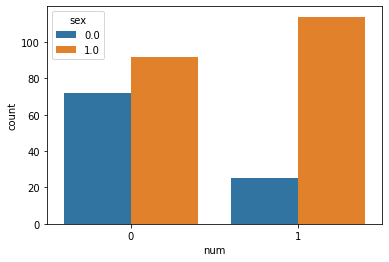

In [14]:
sns.countplot(x=raw_dataset["num"], hue=raw_dataset["sex"])
plt.show()

## Inference from above graph
1. Majority of the patients with heart disease are observed to be female

## 6.Analyzing the data of affected patients 

In [15]:
affected_patients_data = raw_dataset[raw_dataset.num == 1]
affected_patients_data.shape[0]

139

In [16]:
affected_males = affected_patients_data[affected_patients_data.sex == 0]
affected_females = affected_patients_data[affected_patients_data.sex == 1]

In [17]:
print("Affected Males   : ", affected_males.shape[0])
print("Affected Females : ", affected_females.shape[0])

Affected Males   :  25
Affected Females :  114


/home/varadmash/anaconda3/envs/python3.7_TF2.0/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


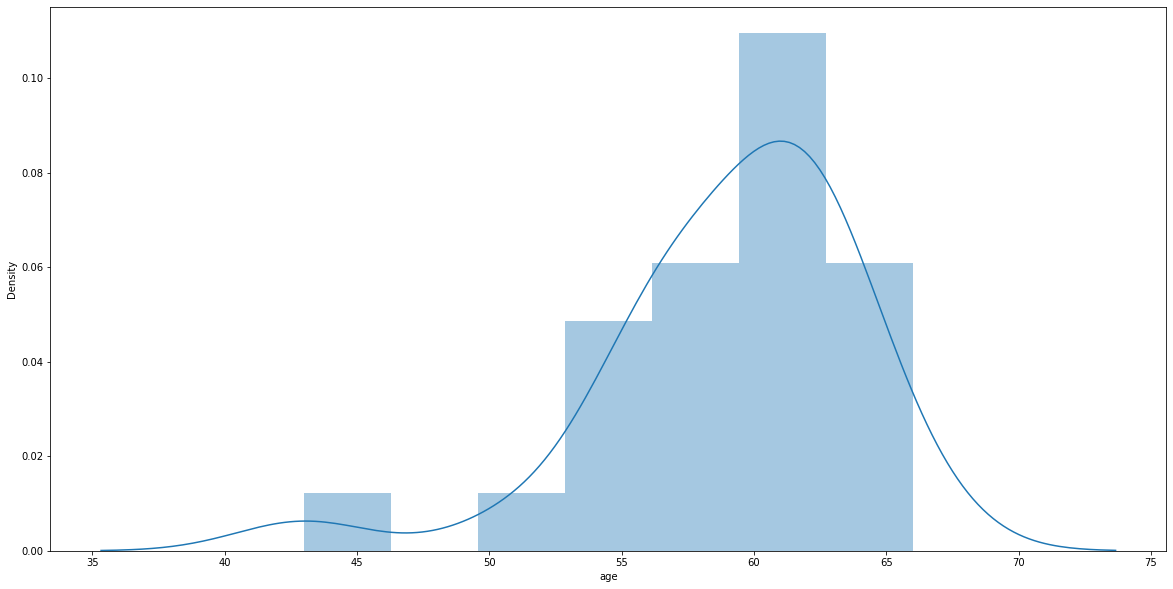

In [18]:
# Checking distribution of genders
fig = plt.figure(figsize=(20, 10))

# Adds subplot on position 1
ax = fig.add_subplot(111)

sns.distplot(affected_males.age)
plt.show()

/home/varadmash/anaconda3/envs/python3.7_TF2.0/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


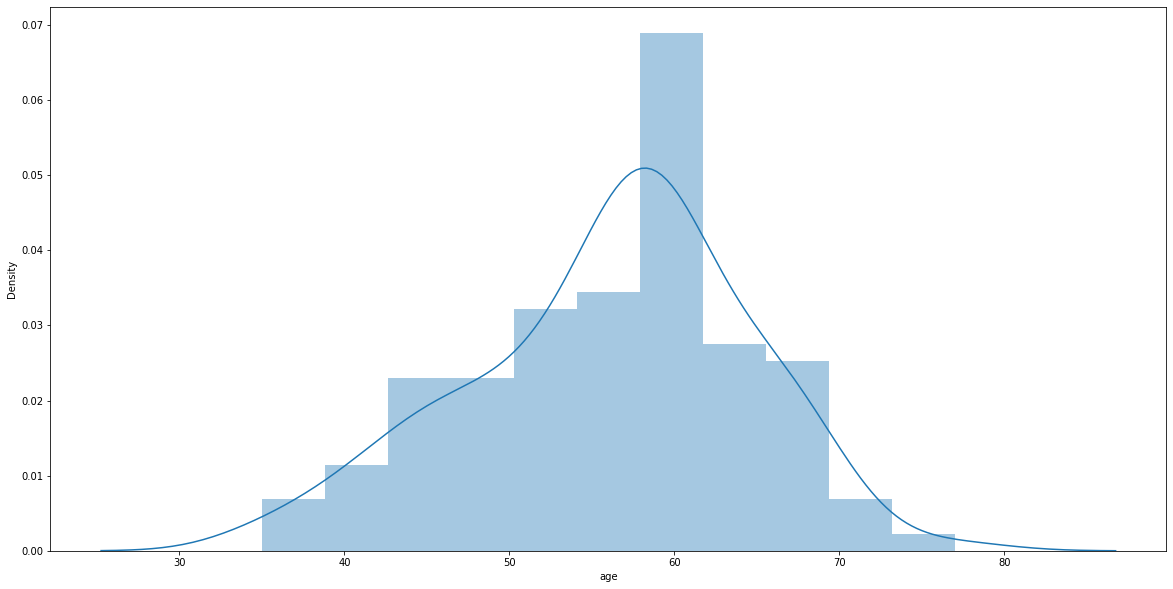

In [19]:
fig = plt.figure(figsize=(20, 10))

# Adds subplot on position 1
ax = fig.add_subplot(111)

sns.distplot(affected_females.age)
plt.show()

### Checking the distribution age data for affected and non affected data

/home/varadmash/anaconda3/envs/python3.7_TF2.0/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


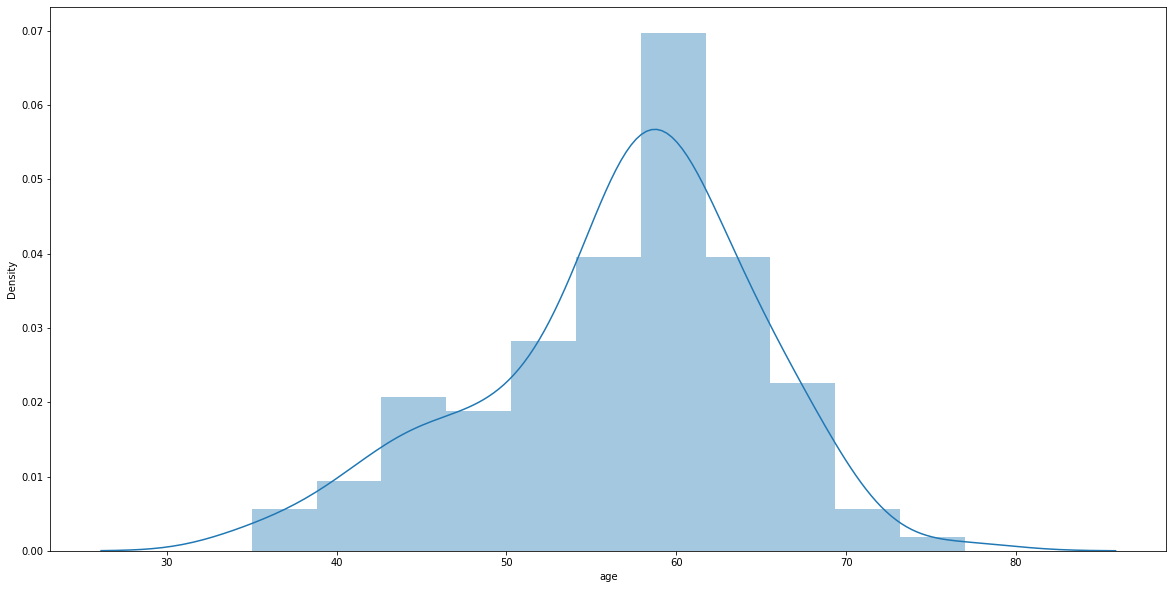

In [20]:
fig = plt.figure(figsize=(20, 10))

# Adds subplot on position 1
ax = fig.add_subplot(111)

sns.distplot(affected_patients_data.age)
plt.show()

## Checking the skewness values for the dataset 

In [21]:
male_age_skewness = affected_males.age.skew()
female_age_skewness = affected_females.age.skew()
age_skewness = affected_patients_data.age.skew()

In [22]:
print("Male age skewness    : ", male_age_skewness)
print("Female age skewness  : ", female_age_skewness)
print("General age skewness : ", age_skewness)

Male age skewness    :  -1.5899806245703558
Female age skewness  :  -0.39177998575457784
General age skewness :  -0.5581515332279088


## Inference from the above plots
1. The female age data and the overall data is not skewed(near 0 coeffecient).
2. The male age data is negatively skewed (left skewed).
3. Outliers not detected.

## 7. Checking the distribution of restecg for affected patients

/home/varadmash/anaconda3/envs/python3.7_TF2.0/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


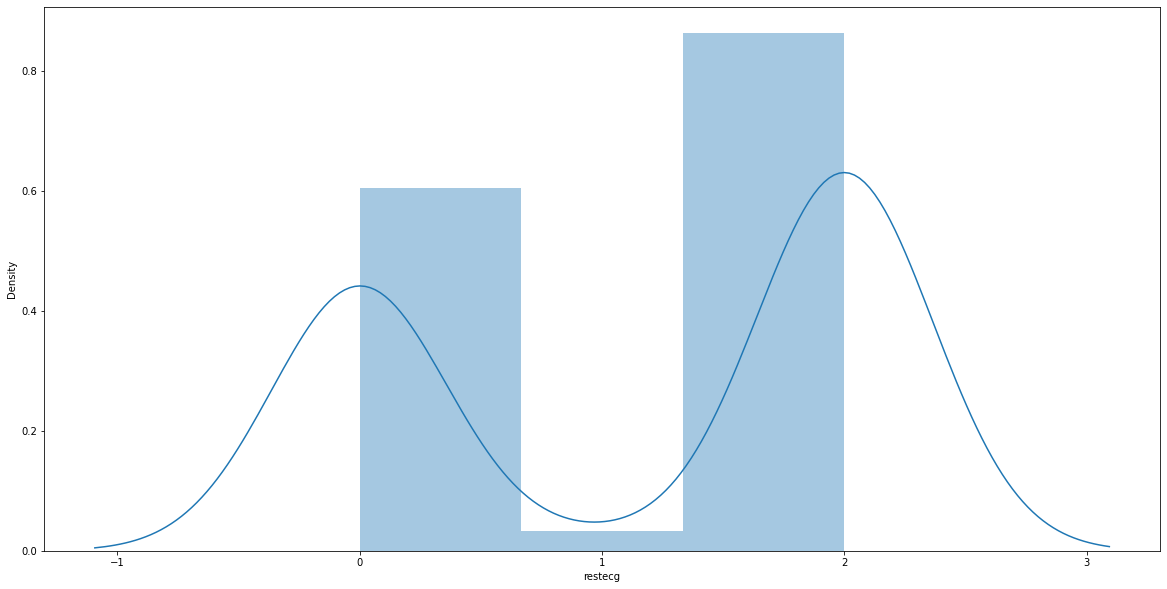

In [23]:
# Checking distribution of genders
fig = plt.figure(figsize=(20, 10))

# Adds subplot on position 1
ax = fig.add_subplot(111)

sns.distplot(affected_patients_data.restecg)
plt.show()

## 7. Checking the distribution of restecg for non affected patients

In [24]:
non_affected_patients_data = raw_dataset[raw_dataset.num == 0]
non_affected_patients_data.shape[0]

164

/home/varadmash/anaconda3/envs/python3.7_TF2.0/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


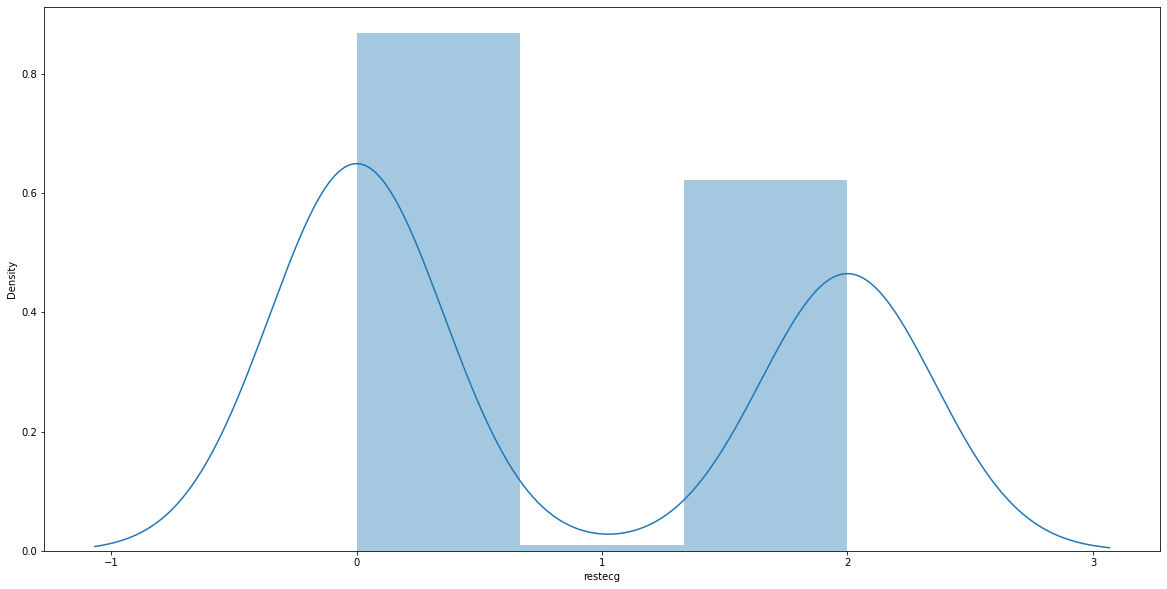

In [25]:
# Checking distribution of genders
fig = plt.figure(figsize=(20, 10))

# Adds subplot on position 1
ax = fig.add_subplot(111)

sns.distplot(non_affected_patients_data.restecg)
plt.show()

## 8. Checking the correlation between variables of the dataset

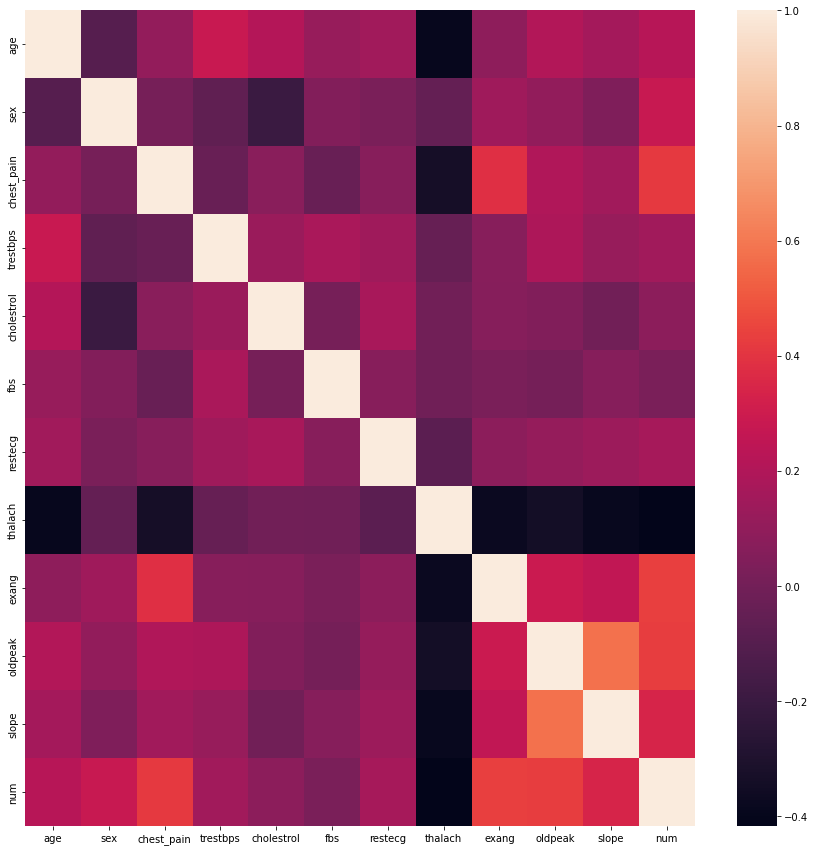

In [26]:
fig = plt.figure(figsize=(15, 15))

# Adds subplot on position 1
ax = fig.add_subplot(111)

sns.heatmap(raw_dataset.corr())
plt.show()

# 2. Data integration

### Data from multiple sources has been collected

In [27]:
# loading the datasets
switzerland_dataset = pd.read_csv("./processed.switzerland.csv", header=None)
hungary_dataset = pd.read_csv("./processed.hungarian.csv", header=None)

In [28]:
# Renaming columns of Switzerland dataset
switzerland_dataset.columns = [
    "age",
    "sex",
    "chest_pain",
    "trestbps",
    "cholestrol",
    "fbs",
    "restecg",
    "thalach",
    "exang",
    "oldpeak",
    "slope",
    "ca",
    "thal",
    "num"
]

# Renaming columns of Hungary dataset
hungary_dataset.columns = [
    "age",
    "sex",
    "chest_pain",
    "trestbps",
    "cholestrol",
    "fbs",
    "restecg",
    "thalach",
    "exang",
    "oldpeak",
    "slope",
    "ca",
    "thal",
    "num"
]

In [29]:
switzerland_dataset.head()

,age,sex,chest_pain,trestbps,cholestrol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,32,1,1,95,0,?,0,127,0,.7,1,?,?,1
1,34,1,4,115,0,?,?,154,0,.2,1,?,?,1
2,35,1,4,?,0,?,0,130,1,?,?,?,7,3
3,36,1,4,110,0,?,0,125,1,1,2,?,6,1
4,38,0,4,105,0,?,0,166,0,2.8,1,?,?,2


In [30]:
hungary_dataset.head()

,age,sex,chest_pain,trestbps,cholestrol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


In [31]:
switzerland_dataset.shape

(123, 14)

In [32]:
hungary_dataset.shape

(294, 14)

In [33]:
# Integrating the datasets (Vertical concatenation of datasets)
integrated_dataset = pd.concat(
    objs=[raw_dataset, hungary_dataset, switzerland_dataset],
    axis=0
)
integrated_dataset.shape

(720, 14)

In [34]:
# Checking total number of rows in all datasets
raw_dataset.shape[0] + hungary_dataset.shape[0] + switzerland_dataset.shape[0]

720

In [35]:
# Saving the integrated dataset
integrated_dataset.to_csv("integrated_dataset.csv")

# 3. Data cleaning

In [46]:
# load integrated data
integrated_dataset = pd.read_csv("./integrated_dataset.csv")

In [47]:
integrated_dataset.isnull().sum()

Unnamed: 0      0
age             0
sex             0
chest_pain      0
trestbps        3
cholestrol     23
fbs            83
restecg         2
thalach         2
exang           2
oldpeak         6
slope         207
ca            413
thal          320
num             0
dtype: int64

In [48]:
integrated_dataset.dtypes

Unnamed: 0      int64
age             int64
sex             int64
chest_pain      int64
trestbps      float64
cholestrol    float64
fbs           float64
restecg       float64
thalach       float64
exang         float64
oldpeak       float64
slope         float64
ca            float64
thal          float64
num             int64
dtype: object

# Note :
1. Here, the following columns contain null values which need to be replaced with appropriate values
    1. trestbps (numerical)
    2. cholestrol (numerical)
    3. fbs
    4. restecg
    5. thalach (numerical)
    6. exang
    7. oldpeak (numerical)
    8. slope
    9. ca
    10. thal
2. Ideal strategy for replacing nunmerical values is to replace them with the mean value of the remaining, none null data.
3. For the categorical variables, modal value of the none null data can be considered for replacement.

### a) Numerical variables

## Calculating mean of numerical variables

In [49]:
numerical_column_list = [
    "trestbps",
    "cholestrol",
    "thalach",
    "oldpeak"
]

In [51]:
numerical_mean_data = {}

# Iterating through all the columns with numerical values
for column in numerical_column_list:
    data = {}
    
    # Extracing the required series
    temp_series = integrated_dataset[column]
    
    # Storing the null value count
    data["null_value_count"] = temp_series.isnull().sum()
    
    # Extracting the non null data
    non_null_values = temp_series[temp_series.isnull() == False]
    
    # Calculating and storing mean, minimum and maximum (for validation)
    data["mean"] = non_null_values.mean()
    data["min"] = non_null_values.min()
    data["max"] = non_null_values.max()
    
    # Storing data in parent dictionary
    numerical_mean_data[column] = data
    
numerical_mean_data

{'trestbps': {'null_value_count': 3,
  'mean': 131.8047419804742,
  'min': 80.0,
  'max': 200.0},
 'cholestrol': {'null_value_count': 23,
  'mean': 204.77474892395983,
  'min': 0.0,
  'max': 603.0},
 'thalach': {'null_value_count': 2,
  'mean': 140.56545961002786,
  'min': 60.0,
  'max': 202.0},
 'oldpeak': {'null_value_count': 6,
  'mean': 0.7896358543417367,
  'min': -2.6,
  'max': 6.2}}

### Copying the dataset into new dataframe

In [53]:
integrated_dataset_non_null = integrated_dataset.copy()
integrated_dataset_non_null.shape

(720, 15)

In [61]:
# Replacing the numerical values with their means
for column in numerical_column_list:
    print(f"Filling data for {column} with mean {numerical_mean_data[column]['mean']}")
    integrated_dataset_non_null[column].fillna(
        value=numerical_mean_data[column]["mean"],
        inplace=True
    )

Filling data for trestbps with mean 131.8047419804742
Filling data for cholestrol with mean 204.77474892395983
Filling data for thalach with mean 140.56545961002786
Filling data for oldpeak with mean 0.7896358543417367


In [62]:
integrated_dataset_non_null.isnull().sum()

Unnamed: 0      0
age             0
sex             0
chest_pain      0
trestbps        0
cholestrol      0
fbs            83
restecg         2
thalach         0
exang           2
oldpeak         0
slope         207
ca            413
thal          320
num             0
dtype: int64

## b) Categorical variables

# Calculating modal values for each categorical variable

In [63]:
categorical_column_list = [
    "fbs",
    "restecg",
    "exang",
    "slope",
    "ca",
    "thal"
]

In [69]:
categorical_modal_data = {}

# Iterating through all the columns with numerical values
for column in categorical_column_list:
    data = {}
    
    # Extracing the required series
    temp_series = integrated_dataset[column]
    
    # Storing the null value count
    data["null_value_count"] = temp_series.isnull().sum()
    
    # Extracting the non null data
    non_null_values = temp_series[temp_series.isnull() == False]
    
    # Calculating and storing mean, minimum and maximum (for validation)
    print(type(non_null_values.mode()[0]))
    data["mode"] = non_null_values.mode()[0]
    data["min"] = non_null_values.unique()
    
    # Storing data in parent dictionary
    categorical_modal_data[column] = data
    
categorical_modal_data

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>


{'fbs': {'null_value_count': 83, 'mode': 0.0, 'min': array([1., 0.])},
 'restecg': {'null_value_count': 2, 'mode': 0.0, 'min': array([2., 0., 1.])},
 'exang': {'null_value_count': 2, 'mode': 0.0, 'min': array([0., 1.])},
 'slope': {'null_value_count': 207, 'mode': 2.0, 'min': array([3., 2., 1.])},
 'ca': {'null_value_count': 413, 'mode': 0.0, 'min': array([0., 3., 2., 1.])},
 'thal': {'null_value_count': 320, 'mode': 3.0, 'min': array([6., 3., 7.])}}

In [71]:
# Replacing the categorical values with their modes
for column in categorical_column_list:
    print(f"Filling data for {column} with mode {categorical_modal_data[column]['mode']}")
    integrated_dataset_non_null[column].fillna(
        value=categorical_modal_data[column]["mode"],
        inplace=True
    )

Filling data for fbs with mode 0.0
Filling data for restecg with mode 0.0
Filling data for exang with mode 0.0
Filling data for slope with mode 2.0
Filling data for ca with mode 0.0
Filling data for thal with mode 3.0


In [73]:
# Checking the dataset for presence of null values
integrated_dataset_non_null.isnull().sum()

Unnamed: 0    0
age           0
sex           0
chest_pain    0
trestbps      0
cholestrol    0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
num           0
dtype: int64

# Note :
1. All null values have been replaced with appropriate mean or mode for numerical and categorical data respectively

In [74]:
# Saving non null data
integrated_dataset_non_null.to_csv("./integrated_dataset_non_null.csv")

# Outlier Detection for numerical variables using skewness coeffecients

In [75]:
# Loading non null dataset
integrated_dataset_non_null = pd.read_csv("./integrated_dataset_non_null.csv")

In [76]:
integrated_dataset_non_null.isnull().sum()

Unnamed: 0      0
Unnamed: 0.1    0
age             0
sex             0
chest_pain      0
trestbps        0
cholestrol      0
fbs             0
restecg         0
thalach         0
exang           0
oldpeak         0
slope           0
ca              0
thal            0
num             0
dtype: int64

In [77]:
integrated_dataset_non_null = integrated_dataset_non_null.drop(
    labels=["Unnamed: 0", "Unnamed: 0.1"], 
    axis=1
)

In [78]:
integrated_dataset_non_null.isnull().sum()

age           0
sex           0
chest_pain    0
trestbps      0
cholestrol    0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
num           0
dtype: int64

In [82]:
# Checking outliers for numerical variables (calculating skewness coeffecients)
# Considering all numerical values for calculation of skewness
numerical_column_list.append("age")

skewness_data = {}
for column in numerical_column_list:
    data = {}
    skewness_coeffecient = integrated_dataset_non_null[column].skew()
    skewness_data[column] = skewness_coeffecient
    
skewness_data

{'trestbps': 0.661187846216948,
 'cholestrol': -0.6379364469139216,
 'thalach': -0.33735338246840146,
 'oldpeak': 1.2340628866394054,
 'age': -0.11891566919764014}

# Observations :
1. The fields trestbps, cholestrol, oldpeak and age are found to be slightly skewed (positive or negative)
2. The field oldpeak is found to be highly skewed towards the right


# Plotting distribution for skewed fields

/home/varadmash/anaconda3/envs/python3.7_TF2.0/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


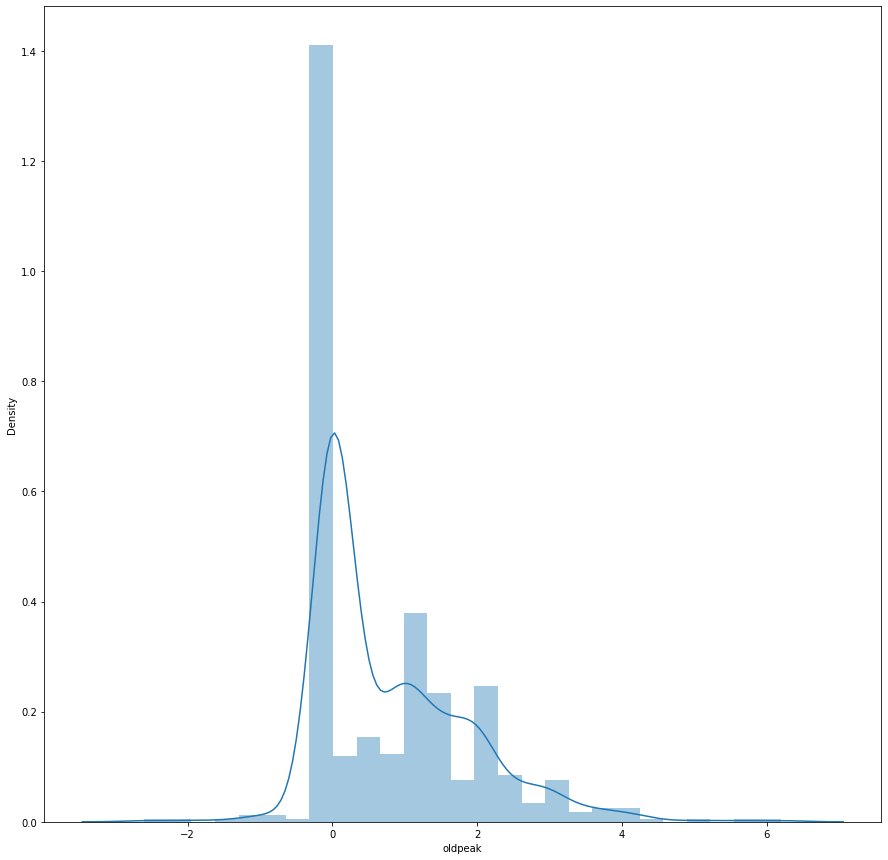

In [83]:
fig = plt.figure(figsize=(15, 15))

# Adds subplot on position 1
ax = fig.add_subplot(111)

sns.distplot(
    integrated_dataset_non_null["oldpeak"]
)
plt.show()

## On observation, the distribution is found to be right tailed

In [86]:
# Checking number of data points beyond 95th percentile of skewed variable
perc = integrated_dataset_non_null["oldpeak"].quantile(0.95)

print("95th percentile : ", perc)
print("Minimum value : ", numerical_mean_data["oldpeak"]["min"])
print("Maximum value : ", numerical_mean_data["oldpeak"]["max"])

filtered_data = integrated_dataset_non_null[integrated_dataset_non_null["oldpeak"] >= perc]
print("Data points beyond 95th percentile : ", filtered_data.shape[0])

95th percentile :  3.0
Minimum value :  -2.6
Maximum value :  6.2
Data points beyond 95th percentile :  38


In [87]:
# Calculating percentage of data beyond 95th percentile of skewed variable
percentage = (filtered_data.shape[0]/integrated_dataset_non_null.shape[0])*100
print("Percentage : ", percentage)

Percentage :  5.277777777777778


# Note :
1. Dropping data beyond 95th percentile is permissible for this case as the outliers are approximately covering 5% of the data.

In [88]:
# Dropping the outlier data
filtered_integrated_data = integrated_dataset_non_null[integrated_dataset_non_null["oldpeak"] < perc]

In [89]:
filtered_integrated_data.shape

(682, 14)

/home/varadmash/anaconda3/envs/python3.7_TF2.0/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


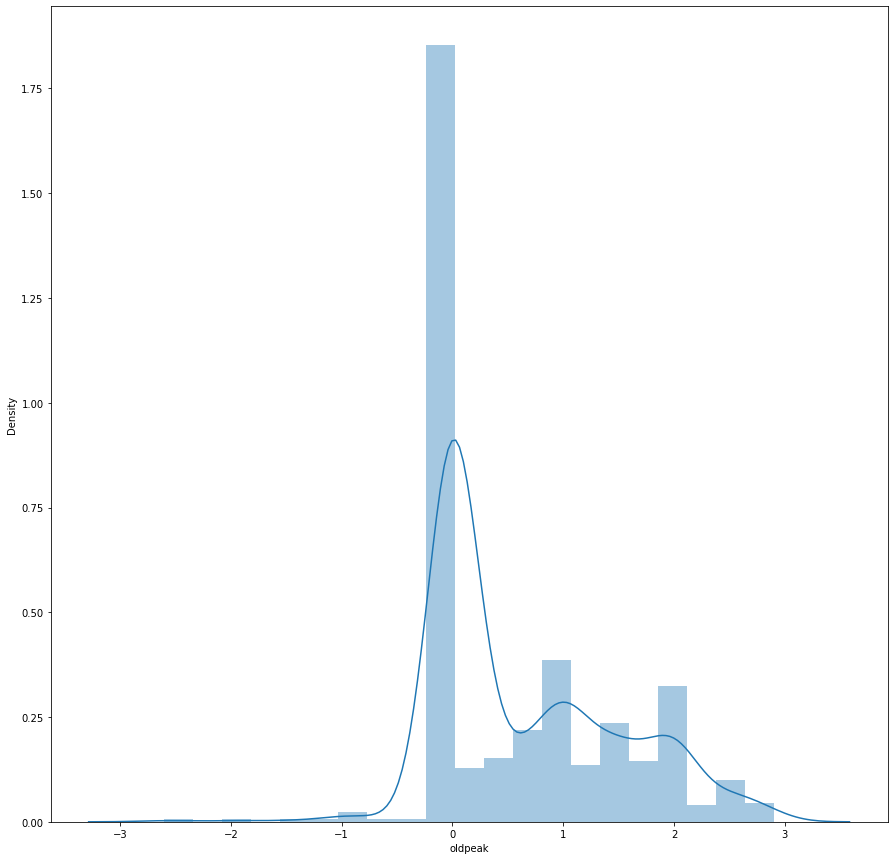

In [90]:
# Plotting the skewed variable
fig = plt.figure(figsize=(15, 15))

# Adds subplot on position 1
ax = fig.add_subplot(111)

sns.distplot(
    filtered_integrated_data["oldpeak"]
)
plt.show()

In [91]:
filtered_integrated_data["oldpeak"].skew()

0.6656562129903879

# Data transformation

# Note :
1. In order for the machine learning algorithms to converge faster, the data can be standardized to reduce the processing load
2. Scaling numerical values to take values between 0 and 1 can be a possible way of transformation of data.
3. This is also known as min-max feature scaling.

In [94]:
# Copying the data into new dataframe
transformed_preprocessed_data = filtered_integrated_data.copy()
transformed_preprocessed_data.shape

(682, 14)

In [96]:
# Scaling the numeric values
  
# apply normalization techniques
for column in numerical_column_list:
    transformed_preprocessed_data[column] = (transformed_preprocessed_data[column] - transformed_preprocessed_data[column].min()) / (transformed_preprocessed_data[column].max() - transformed_preprocessed_data[column].min())    
  

In [97]:
transformed_preprocessed_data.head(20)

,age,sex,chest_pain,trestbps,cholestrol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.714286,1,1,0.541667,0.386401,1.0,2.0,0.633803,0.0,0.890909,3.0,0.0,6.0,0
1,0.795918,1,4,0.666667,0.474295,0.0,2.0,0.338028,1.0,0.745455,2.0,3.0,3.0,1
2,0.795918,1,4,0.333333,0.379768,0.0,2.0,0.485915,1.0,0.945455,2.0,2.0,7.0,1
4,0.265306,0,2,0.416667,0.338308,0.0,2.0,0.788732,0.0,0.727273,1.0,0.0,3.0,0
5,0.571429,1,2,0.333333,0.391376,0.0,0.0,0.830986,0.0,0.618182,1.0,0.0,3.0,0
7,0.591837,0,4,0.333333,0.587065,0.0,0.0,0.725352,1.0,0.581818,1.0,0.0,3.0,0
8,0.714286,1,4,0.416667,0.421227,0.0,2.0,0.612676,0.0,0.727273,2.0,1.0,7.0,1
10,0.591837,1,4,0.500000,0.318408,0.0,0.0,0.619718,0.0,0.545455,2.0,0.0,6.0,0
11,0.571429,0,2,0.500000,0.487562,0.0,2.0,0.654930,0.0,0.709091,2.0,0.0,3.0,0
12,0.571429,1,3,0.416667,0.424544,1.0,2.0,0.577465,1.0,0.581818,2.0,1.0,6.0,1


In [98]:
# Saving the preprocessed and transformed data
transformed_preprocessed_data.to_csv("./preprocessed_data.csv")

<center><h1>End of Notebook</h1></center>